## Hate Speech Detection - Milestone 2

In [1]:
#Stuthi Shrisha

In [47]:
!pip install scikit-learn

### Preprocessing Unbalanced Dataset and TfIdf Vectorization Phase 2

In [2]:
#Importing necessary libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text.strip()  # Strip leading/trailing whitespace

New data is unbalanced, contains 24783 rows, 7 columns with the class column as the target feature

In [4]:
#loading unbalanced dataset
try:
    df = pd.read_csv(r"C:\Users\viole\Desktop\Datasets\data2.csv")
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")
    exit(1)
df.shape

(24783, 7)

In [5]:
if 'Class' in df.columns:
    df.drop(columns=['Class'], inplace=True)

In [6]:
text_data = df['tweet'].tolist()
labels = df['class'].tolist()

In [7]:
preprocessor = FunctionTransformer(lambda x: [preprocess_text(text) for text in x])

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 

In [9]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('tfidf', tfidf_vectorizer)
])

In [10]:
# Fit-transform the pipeline on the text data
try:
    tfidf_matrix = pipeline.fit_transform(text_data)
except Exception as e:
    print(f"Error in pipeline fit-transform: {e}")
    exit(1)

In [11]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [12]:
output_file = 'tfidf_data.csv'

In [13]:
#tfidf_df.to_csv(output_file, index=False)
print(f"TF-IDF vectorized data saved to {output_file}")

TF-IDF vectorized data saved to tfidf_data.csv


### Data Splitting

Data is now split into training, testing and validation sets, with a ratio of 70:15:15

In [14]:
# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Model Training and Testing

In [15]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### 1. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
val_predictions_rf = rf_classifier.predict(X_val)

In [17]:

val_accuracy_rf = accuracy_score(y_val, val_predictions_rf)
print(f'Validation Accuracy: {val_accuracy_rf:.4f}')

val_classification_report_rf = classification_report(y_val, val_predictions_rf)
print('Classification Report on Validation Set:')
print(val_classification_report_rf)


Validation Accuracy: 0.8878
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.56      0.11      0.19       220
           1       0.91      0.96      0.94      2867
           2       0.80      0.83      0.81       630

    accuracy                           0.89      3717
   macro avg       0.76      0.63      0.65      3717
weighted avg       0.87      0.89      0.87      3717



<Axes: >

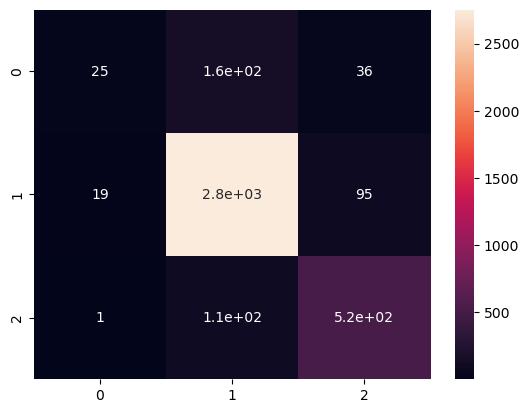

In [18]:
sns.heatmap(confusion_matrix(y_val, val_predictions_rf),annot=True)

In [19]:
test_predictions_rf = rf_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
print(f'Test Accuracy: {test_accuracy_rf:.4f}')

test_classification_report_rf = classification_report(y_test, test_predictions_rf)
print('Classification Report on Test Set:')
print(test_classification_report_rf)


Test Accuracy: 0.8865
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.48      0.13      0.21       207
           1       0.91      0.96      0.93      2880
           2       0.82      0.80      0.81       631

    accuracy                           0.89      3718
   macro avg       0.74      0.63      0.65      3718
weighted avg       0.87      0.89      0.87      3718



<Axes: >

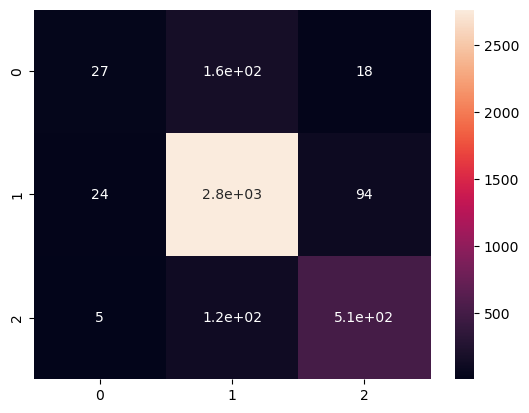

In [20]:
sns.heatmap(confusion_matrix(y_test, test_predictions_rf), annot=True)

### 2.Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)
val_predictions_lr = lr_classifier.predict(X_val)

In [22]:

val_accuracy_lr = accuracy_score(y_val, val_predictions_lr)
print(f'Validation Accuracy (Logistic Regression): {val_accuracy_lr:.4f}')

val_classification_report_lr = classification_report(y_val, val_predictions_lr)
print('Classification Report on Validation Set (Logistic Regression):')
print(val_classification_report_lr)


Validation Accuracy (Logistic Regression): 0.8881
Classification Report on Validation Set (Logistic Regression):
              precision    recall  f1-score   support

           0       0.49      0.15      0.24       220
           1       0.91      0.96      0.93      2867
           2       0.82      0.82      0.82       630

    accuracy                           0.89      3717
   macro avg       0.74      0.64      0.66      3717
weighted avg       0.87      0.89      0.87      3717



<Axes: >

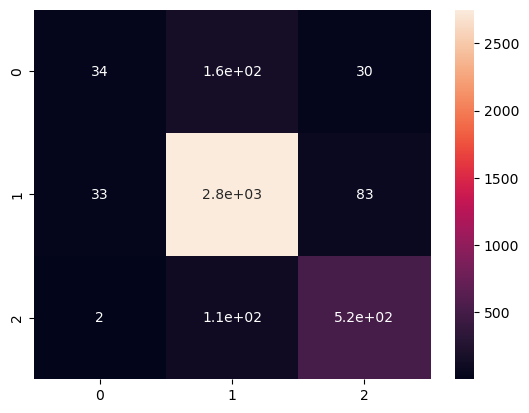

In [23]:
sns.heatmap(confusion_matrix(y_val, val_predictions_lr), annot=True)

In [24]:
# Optionally, evaluate on test set if needed
test_predictions_lr = lr_classifier.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, test_predictions_lr)
print(f'Test Accuracy (Logistic Regression): {test_accuracy_lr:.4f}')

test_classification_report_lr = classification_report(y_test, test_predictions_lr)
print('Classification Report on Test Set (Logistic Regression):')
print(test_classification_report_lr)


Test Accuracy (Logistic Regression): 0.8886
Classification Report on Test Set (Logistic Regression):
              precision    recall  f1-score   support

           0       0.52      0.20      0.29       207
           1       0.91      0.96      0.93      2880
           2       0.84      0.78      0.81       631

    accuracy                           0.89      3718
   macro avg       0.76      0.65      0.68      3718
weighted avg       0.87      0.89      0.88      3718



<Axes: >

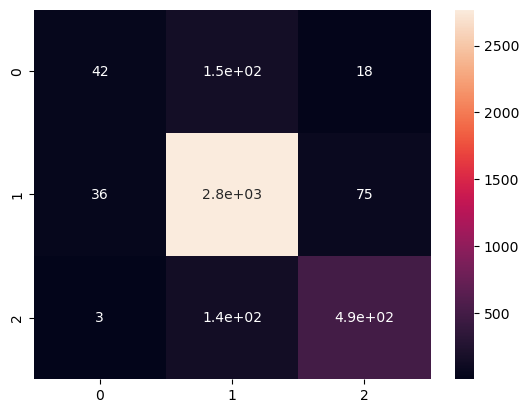

In [25]:
sns.heatmap(confusion_matrix(y_test, test_predictions_lr), annot=True)

### 3.XGBoost

In [26]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
val_predictions_xgb = xgb_classifier.predict(X_val)


In [27]:
# Evaluate performance on validation set
val_accuracy_xgb = accuracy_score(y_val, val_predictions_xgb)
print(f'Validation Accuracy (XGBoost): {val_accuracy_xgb:.4f}')

val_classification_report_xgb = classification_report(y_val, val_predictions_xgb)
print('Classification Report on Validation Set (XGBoost):')
print(val_classification_report_xgb)

Validation Accuracy (XGBoost): 0.8951
Classification Report on Validation Set (XGBoost):
              precision    recall  f1-score   support

           0       0.47      0.19      0.27       220
           1       0.94      0.94      0.94      2867
           2       0.77      0.94      0.85       630

    accuracy                           0.90      3717
   macro avg       0.73      0.69      0.68      3717
weighted avg       0.88      0.90      0.88      3717



<Axes: >

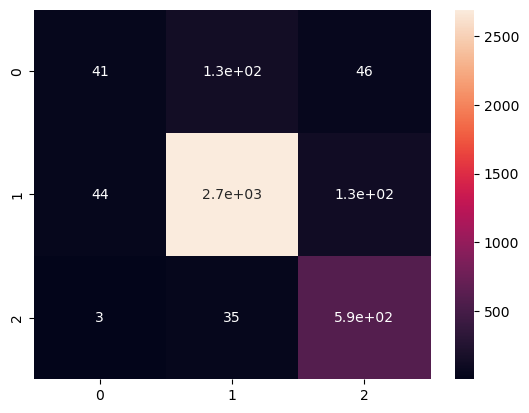

In [28]:
sns.heatmap(confusion_matrix(y_val, val_predictions_xgb), annot=True)

In [29]:
# Optionally, evaluate on test set if needed
test_predictions_xgb = xgb_classifier.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, test_predictions_xgb)
print(f'Test Accuracy (XGBoost): {test_accuracy_xgb:.4f}')

test_classification_report_xgb = classification_report(y_test, test_predictions_xgb)
print('Classification Report on Test Set (XGBoost):')
print(test_classification_report_xgb)

Test Accuracy (XGBoost): 0.8930
Classification Report on Test Set (XGBoost):
              precision    recall  f1-score   support

           0       0.47      0.20      0.28       207
           1       0.94      0.94      0.94      2880
           2       0.77      0.93      0.84       631

    accuracy                           0.89      3718
   macro avg       0.73      0.69      0.69      3718
weighted avg       0.88      0.89      0.88      3718



<Axes: >

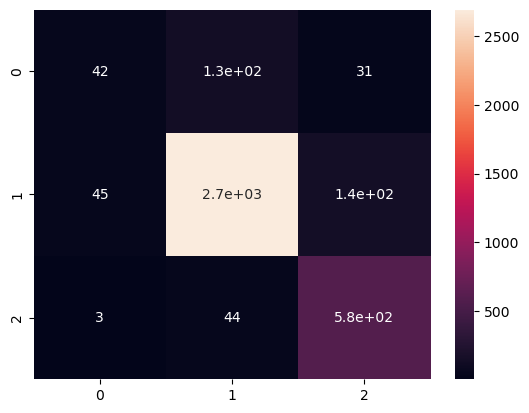

In [30]:
sns.heatmap(confusion_matrix(y_test, test_predictions_xgb), annot=True)

### 4.SVM

In [31]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
val_predictions_svm = svm_classifier.predict(X_val)

In [32]:
# Evaluate performance on validation set
val_accuracy_svm = accuracy_score(y_val, val_predictions_svm)
print(f'Validation Accuracy (SVM): {val_accuracy_svm:.4f}')

val_classification_report_svm = classification_report(y_val, val_predictions_svm)
print('Classification Report on Validation Set (SVM):')
print(val_classification_report_svm)


Validation Accuracy (SVM): 0.8897
Classification Report on Validation Set (SVM):
              precision    recall  f1-score   support

           0       0.55      0.07      0.13       220
           1       0.91      0.96      0.94      2867
           2       0.82      0.83      0.83       630

    accuracy                           0.89      3717
   macro avg       0.76      0.62      0.63      3717
weighted avg       0.87      0.89      0.87      3717



<Axes: >

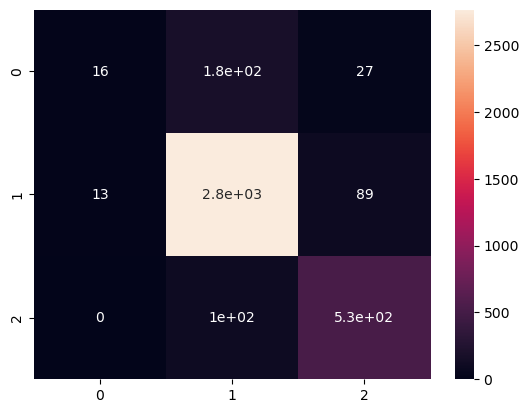

In [33]:
sns.heatmap(confusion_matrix(y_val, val_predictions_svm), annot=True)

In [34]:
# Optionally, evaluate on test set if needed
test_predictions_svm = svm_classifier.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, test_predictions_svm)
print(f'Test Accuracy (SVM): {test_accuracy_svm:.4f}')

test_classification_report_svm = classification_report(y_test, test_predictions_svm)
print('Classification Report on Test Set (SVM):')
print(test_classification_report_svm)

Test Accuracy (SVM): 0.8911
Classification Report on Test Set (SVM):
              precision    recall  f1-score   support

           0       0.58      0.10      0.17       207
           1       0.91      0.97      0.94      2880
           2       0.83      0.81      0.82       631

    accuracy                           0.89      3718
   macro avg       0.77      0.62      0.64      3718
weighted avg       0.88      0.89      0.87      3718



<Axes: >

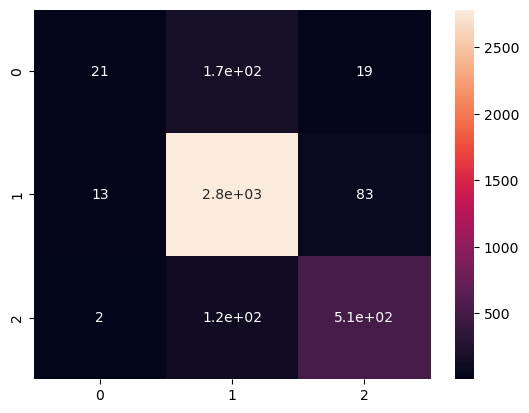

In [35]:
sns.heatmap( confusion_matrix(y_test, test_predictions_svm), annot=True)

### 5.Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
val_predictions_dt = dt_classifier.predict(X_val)

In [37]:
# Evaluate performance on validation set
val_accuracy_dt = accuracy_score(y_val, val_predictions_dt)
print(f'Validation Accuracy (Decision Tree): {val_accuracy_dt:.4f}')

val_classification_report_dt = classification_report(y_val, val_predictions_dt)
print('Classification Report on Validation Set (Decision Tree):')
print(val_classification_report_dt)


Validation Accuracy (Decision Tree): 0.8639
Classification Report on Validation Set (Decision Tree):
              precision    recall  f1-score   support

           0       0.27      0.22      0.24       220
           1       0.92      0.92      0.92      2867
           2       0.79      0.81      0.80       630

    accuracy                           0.86      3717
   macro avg       0.66      0.65      0.65      3717
weighted avg       0.86      0.86      0.86      3717



<Axes: >

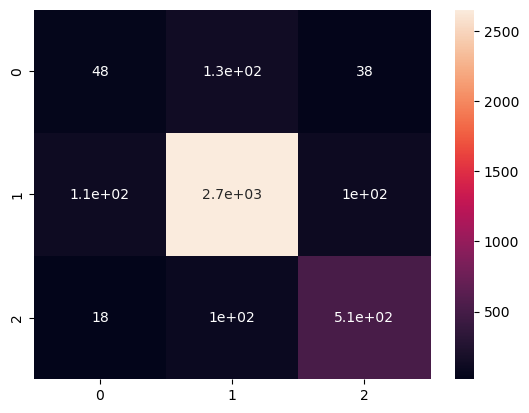

In [38]:
sns.heatmap(confusion_matrix(y_val, val_predictions_dt), annot=True)

In [39]:
# Optionally, evaluate on test set if needed
test_predictions_dt = dt_classifier.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, test_predictions_dt)
print(f'Test Accuracy (Decision Tree): {test_accuracy_dt:.4f}')

test_classification_report_dt = classification_report(y_test, test_predictions_dt)
print('Classification Report on Test Set (Decision Tree):')
print(test_classification_report_dt)


Test Accuracy (Decision Tree): 0.8604
Classification Report on Test Set (Decision Tree):
              precision    recall  f1-score   support

           0       0.28      0.23      0.25       207
           1       0.91      0.92      0.92      2880
           2       0.77      0.79      0.78       631

    accuracy                           0.86      3718
   macro avg       0.65      0.65      0.65      3718
weighted avg       0.85      0.86      0.86      3718



<Axes: >

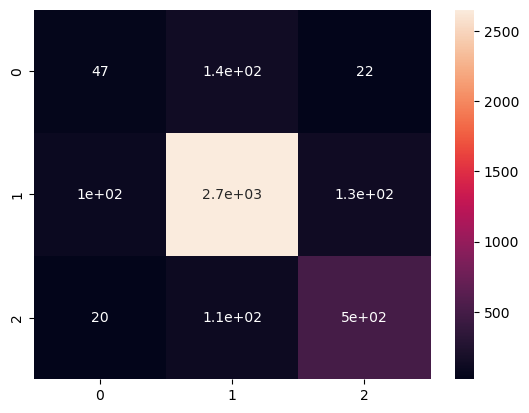

In [40]:
sns.heatmap(confusion_matrix(y_test, test_predictions_dt), annot=True)

### Plotting

In [41]:
import matplotlib.pyplot as plt
import numpy as np

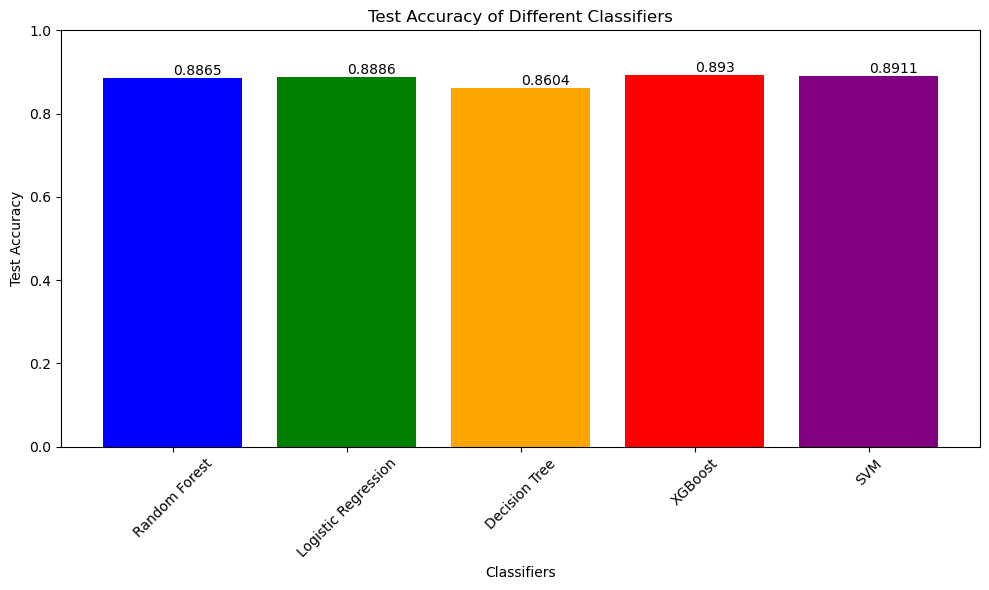

In [42]:
# Test accuracies for each classifier
classifiers = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM']
accuracies = [test_accuracy_rf, test_accuracy_lr, test_accuracy_dt, test_accuracy_xgb, test_accuracy_svm]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Classifiers')
plt.ylim([0.0, 1.0])  # Setting y-axis limit to better visualize differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding the actual value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


### Model Conversion using Joblib

In [ ]:
import pickle
import joblib
import numpy as np

# Load the model and vectorizer from the file
loaded_model = joblib.load("xgb_classifier.joblib")
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_tfidf_vectorizer = pickle.load(f)

class_labels = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Not hate speech, not offensive language'}

def classify_text(text):
    # Transform the input data using the loaded TF-IDF vectorizer
    input_transformed = loaded_tfidf_vectorizer.transform([text])

    # Make prediction
    prediction = loaded_model.predict(input_transformed)

    # Get the predicted class label
    predicted_class = class_labels[prediction[0]]
    return predicted_class

if __name__ == "__main__":
    # Ask for user input
    input_text = input("Enter text to classify: ")
    
    # Classify the input text
    predicted_class = classify_text(input_text)
    
    # Print the classification result
    print(f"Input: {input_text} -> Prediction: {predicted_class}")


In [44]:
import os

print("Current Working Directory:", os.getcwd())
print("Is 'xgb_classifier.joblib' in CWD?", os.path.exists('xgb_classifier.joblib'))
print("Is 'tfidf_vectorizer.pkl' in CWD?", os.path.exists('tfidf_vectorizer.pkl'))


Current Working Directory: C:\Users\viole\Desktop\Datasets
Is 'xgb_classifier.joblib' in CWD? True
Is 'tfidf_vectorizer.pkl' in CWD? True
